<a href="https://colab.research.google.com/github/Sonal-kumar1998/ANN_Based_Device_Modelling/blob/main/AC_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_path = "/content/drive/MyDrive/DDP/AC_Model/Data/AC_Characterisation.csv"
data = pd.read_csv(data_path).astype("float")
data.head()

,"#""frequency""",v(d),v(s),v(g),v(b),"c(d,d)","c(d,s)","c(d,g)","c(d,b)","c(s,d)","c(s,s)","c(s,g)","c(s,b)","c(g,d)","c(g,s)","c(g,g)","c(g,b)","c(b,d)","c(b,s)","c(b,g)","c(b,b)"
0,2.400000e+09,-7.120000e-42,7.120000e-42,0.0,0.0,7.120000e-15,7.930000e-17,-6.110000e-15,-1.090000e-15,7.930000e-17,7.760000e-16,-4.340000e-16,-4.210000e-16,-6.110000e-15,-4.340000e-16,6.630000e-15,-8.550000e-17,-1.090000e-15,-4.210000e-16,-8.550000e-17,1.600000e-15
1,2.400000e+09,8.000000e-03,7.120000e-42,0.0,0.0,7.090000e-15,6.960000e-17,-6.070000e-15,-1.090000e-15,4.940000e-17,7.750000e-16,-4.070000e-16,-4.170000e-16,-6.050000e-15,-4.240000e-16,6.560000e-15,-8.560000e-17,-1.090000e-15,-4.200000e-16,-8.590000e-17,1.590000e-15
2,2.400000e+09,1.600000e-02,-1.270000e-33,0.0,0.0,7.050000e-15,6.160000e-17,-6.020000e-15,-1.090000e-15,2.760000e-17,7.740000e-16,-3.870000e-16,-4.140000e-16,-5.990000e-15,-4.160000e-16,6.490000e-15,-8.630000e-17,-1.080000e-15,-4.200000e-16,-8.670000e-17,1.590000e-15
3,2.400000e+09,2.400000e-02,-3.820000e-33,0.0,0.0,6.990000e-15,5.570000e-17,-5.960000e-15,-1.090000e-15,1.270000e-17,7.730000e-16,-3.740000e-16,-4.120000e-16,-5.920000e-15,-4.100000e-16,6.420000e-15,-8.730000e-17,-1.080000e-15,-4.190000e-16,-8.780000e-17,1.590000e-15
4,2.400000e+09,3.200000e-02,-5.220000e-30,0.0,0.0,6.910000e-15,5.160000e-17,-5.880000e-15,-1.080000e-15,3.040000e-18,7.730000e-16,-3.650000e-16,-4.110000e-16,-5.840000e-15,-4.060000e-16,6.340000e-15,-8.860000e-17,-1.070000e-15,-4.180000e-16,-8.910000e-17,1.580000e-15


In [ ]:
data.describe()

,"#""frequency""",v(d),v(s),v(g),v(b),"c(d,d)","c(d,s)","c(d,g)","c(d,b)","c(s,d)","c(s,s)","c(s,g)","c(s,b)","c(g,d)","c(g,s)","c(g,g)","c(g,b)","c(b,d)","c(b,s)","c(b,g)","c(b,b)"
count,1.137260e+05,1.137260e+05,1.137260e+05,113726.000000,113726.0,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05,1.137260e+05
mean,2.400000e+09,4.500000e+00,1.511229e-32,1.000000,0.0,9.698452e-16,3.848219e-15,-4.059837e-15,-7.581982e-16,3.909152e-16,3.785679e-15,-4.075211e-15,-1.013422e-16,-9.061421e-16,-7.009161e-15,7.904486e-15,1.076702e-17,-4.546234e-16,-6.246762e-16,2.305243e-16,8.487745e-16
std,0.000000e+00,2.600392e+00,2.266136e-30,0.583098,0.0,7.378490e-16,2.528874e-15,2.669213e-15,5.114689e-16,5.229569e-16,3.475936e-15,3.718614e-15,4.117990e-16,8.486971e-16,3.861624e-15,4.292398e-15,9.570464e-17,1.607440e-16,1.811161e-16,1.722342e-16,3.377329e-16
min,2.400000e+09,-1.020000e-32,-7.310000e-29,0.000000,0.0,4.550000e-16,1.170000e-17,-1.290000e-14,-2.720000e-15,-1.670000e-16,-8.230000e-16,-1.030000e-14,-9.340000e-16,-6.480000e-15,-1.580000e-14,6.840000e-16,-1.250000e-16,-1.090000e-15,-1.020000e-15,-1.240000e-16,4.800000e-16
25%,2.400000e+09,2.250000e+00,-3.820000e-33,0.500000,0.0,5.820000e-16,1.760000e-15,-5.490000e-15,-8.660000e-16,-1.420000e-17,6.670000e-16,-8.100000e-15,-1.850000e-16,-1.250000e-15,-9.650000e-15,4.540000e-15,-3.930000e-17,-5.790000e-16,-7.630000e-16,6.850000e-17,5.640000e-16
50%,2.400000e+09,4.500000e+00,-3.050000e-38,1.000000,0.0,7.470000e-16,3.510000e-15,-3.700000e-15,-6.550000e-16,1.220000e-17,1.810000e-15,-1.820000e-15,-1.470000e-16,-7.560000e-16,-6.940000e-15,8.230000e-15,-3.250000e-17,-4.040000e-16,-6.470000e-16,2.350000e-16,7.080000e-16
75%,2.400000e+09,6.750000e+00,2.580000e-33,1.500000,0.0,1.030000e-15,5.350000e-15,-1.850000e-15,-3.720000e-16,7.657500e-16,7.670000e-15,-6.030000e-16,-5.360000e-17,-2.510000e-16,-4.170000e-15,1.080000e-14,4.290000e-17,-3.150000e-16,-5.110000e-16,3.810000e-16,1.140000e-15
max,2.400000e+09,9.000000e+00,8.350000e-29,2.000000,0.0,7.440000e-15,1.130000e-14,-2.160000e-16,-2.860000e-16,2.060000e-15,9.860000e-15,-3.540000e-16,1.510000e-15,-1.850000e-16,-3.820000e-16,1.720000e-14,5.500000e-16,-2.480000e-16,-1.590000e-16,5.400000e-16,1.600000e-15


In [ ]:
data.head()

,"#""frequency""",v(d),v(s),v(g),v(b),"c(d,d)","c(d,s)","c(d,g)","c(d,b)","c(s,d)","c(s,s)","c(s,g)","c(s,b)","c(g,d)","c(g,s)","c(g,g)","c(g,b)","c(b,d)","c(b,s)","c(b,g)","c(b,b)"
0,2.400000e+09,-7.120000e-42,7.120000e-42,0.0,0.0,7.120000e-15,7.930000e-17,-6.110000e-15,-1.090000e-15,7.930000e-17,7.760000e-16,-4.340000e-16,-4.210000e-16,-6.110000e-15,-4.340000e-16,6.630000e-15,-8.550000e-17,-1.090000e-15,-4.210000e-16,-8.550000e-17,1.600000e-15
1,2.400000e+09,8.000000e-03,7.120000e-42,0.0,0.0,7.090000e-15,6.960000e-17,-6.070000e-15,-1.090000e-15,4.940000e-17,7.750000e-16,-4.070000e-16,-4.170000e-16,-6.050000e-15,-4.240000e-16,6.560000e-15,-8.560000e-17,-1.090000e-15,-4.200000e-16,-8.590000e-17,1.590000e-15
2,2.400000e+09,1.600000e-02,-1.270000e-33,0.0,0.0,7.050000e-15,6.160000e-17,-6.020000e-15,-1.090000e-15,2.760000e-17,7.740000e-16,-3.870000e-16,-4.140000e-16,-5.990000e-15,-4.160000e-16,6.490000e-15,-8.630000e-17,-1.080000e-15,-4.200000e-16,-8.670000e-17,1.590000e-15
3,2.400000e+09,2.400000e-02,-3.820000e-33,0.0,0.0,6.990000e-15,5.570000e-17,-5.960000e-15,-1.090000e-15,1.270000e-17,7.730000e-16,-3.740000e-16,-4.120000e-16,-5.920000e-15,-4.100000e-16,6.420000e-15,-8.730000e-17,-1.080000e-15,-4.190000e-16,-8.780000e-17,1.590000e-15
4,2.400000e+09,3.200000e-02,-5.220000e-30,0.0,0.0,6.910000e-15,5.160000e-17,-5.880000e-15,-1.080000e-15,3.040000e-18,7.730000e-16,-3.650000e-16,-4.110000e-16,-5.840000e-15,-4.060000e-16,6.340000e-15,-8.860000e-17,-1.070000e-15,-4.180000e-16,-8.910000e-17,1.580000e-15


In [ ]:
Vgs = [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6]
cap_data = data.loc[data["v(g)"].isin(Vgs)]
cap_data = cap_data.sort_values(by=["v(g)", "v(d)"])
cap_data.head()

,"#""frequency""",v(d),v(s),v(g),v(b),"c(d,d)","c(d,s)","c(d,g)","c(d,b)","c(s,d)","c(s,s)","c(s,g)","c(s,b)","c(g,d)","c(g,s)","c(g,g)","c(g,b)","c(b,d)","c(b,s)","c(b,g)","c(b,b)"
64182,2.400000e+09,-1.590000e-38,-2.350000e-38,0.2,0.0,3.760000e-15,1.860000e-15,-4.700000e-15,-9.200000e-16,1.860000e-15,2.010000e-15,-3.230000e-15,-6.430000e-16,-4.700000e-15,-3.230000e-15,7.970000e-15,-3.320000e-17,-9.200000e-16,-6.430000e-16,-3.320000e-17,1.600000e-15
64183,2.400000e+09,8.000000e-03,-5.220000e-30,0.2,0.0,3.890000e-15,1.930000e-15,-4.880000e-15,-9.440000e-16,1.820000e-15,1.970000e-15,-3.170000e-15,-6.280000e-16,-4.790000e-15,-3.260000e-15,8.070000e-15,-2.230000e-17,-9.250000e-16,-6.440000e-16,-2.410000e-17,1.590000e-15
64184,2.400000e+09,1.600000e-02,5.220000e-30,0.2,0.0,4.050000e-15,2.000000e-15,-5.080000e-15,-9.700000e-16,1.770000e-15,1.920000e-15,-3.090000e-15,-6.100000e-16,-4.890000e-15,-3.280000e-15,8.180000e-15,-1.080000e-17,-9.310000e-16,-6.450000e-16,-1.440000e-17,1.590000e-15
64185,2.400000e+09,2.400000e-02,5.220000e-30,0.2,0.0,4.220000e-15,2.080000e-15,-5.300000e-15,-9.980000e-16,1.720000e-15,1.870000e-15,-3.000000e-15,-5.910000e-16,-4.990000e-15,-3.300000e-15,8.300000e-15,1.600000e-18,-9.380000e-16,-6.460000e-16,-4.160000e-18,1.590000e-15
64186,2.400000e+09,3.200000e-02,1.570000e-29,0.2,0.0,4.400000e-15,2.160000e-15,-5.530000e-15,-1.030000e-15,1.650000e-15,1.810000e-15,-2.890000e-15,-5.700000e-16,-5.110000e-15,-3.330000e-15,8.420000e-15,1.470000e-17,-9.440000e-16,-6.470000e-16,6.750000e-18,1.580000e-15


#Plot Capacitance verse **Vds**

In [ ]:
def plot_cap(Vgs,path, cap):
  cap = str(cap)
  data1 = pd.read_csv(path).astype("float")
  for vol in Vgs:
    cap_data1 = data1.loc[data1["v(g)"].isin([vol])]
    cap_data1.sort_values(by="v(d)")
    plt.plot(cap_data1["v(d)"], cap_data1[cap], label = "Vgs = " + str(vol) + "V")
  plt.legend()
  plt.xlabel("Drain Voltage(Vds)")
  plt.ylabel(cap)
  plt.title("Drain Voltage(Vds) Vs " + cap)
  plt.show()
  plt.savefig("/content/drive/MyDrive/DDP/AC_Model/Plot/C-V_Plot/" +cap)

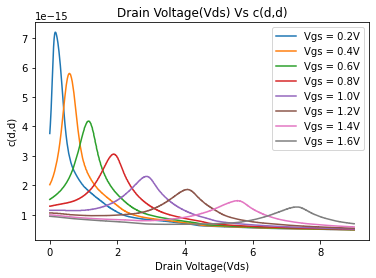

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_cap(Vgs, data_path, "c(d,d)")

In [ ]:
caps = list(cap_data.columns)[5:]

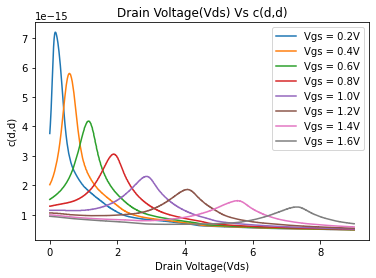

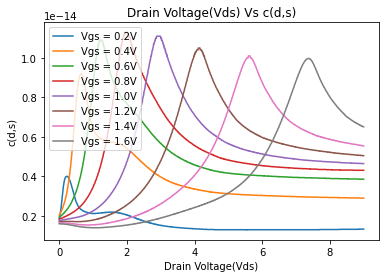

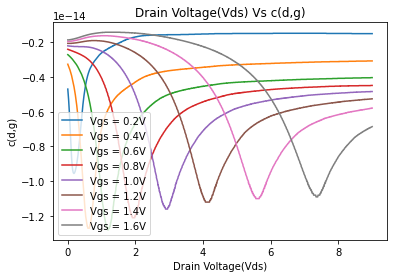

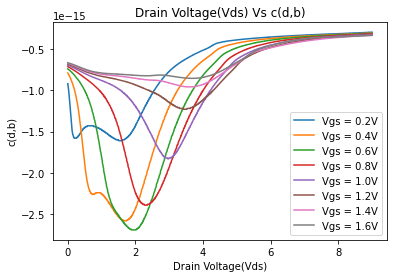

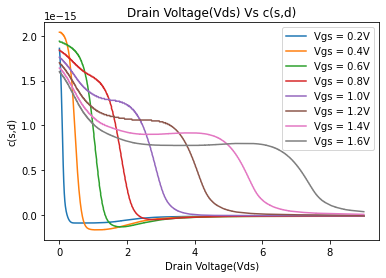

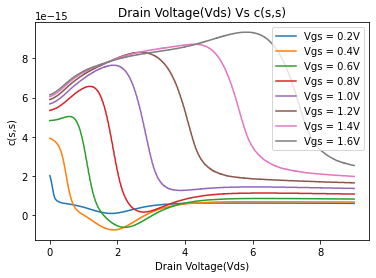

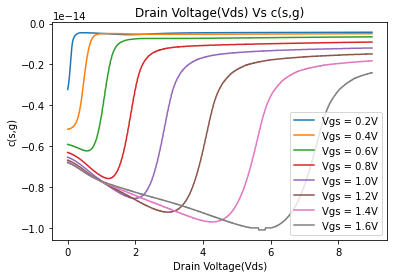

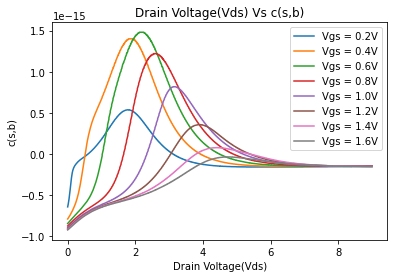

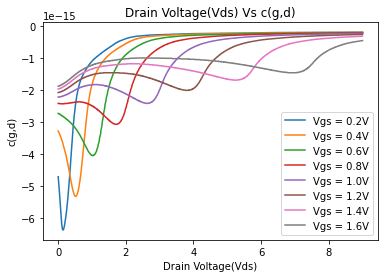

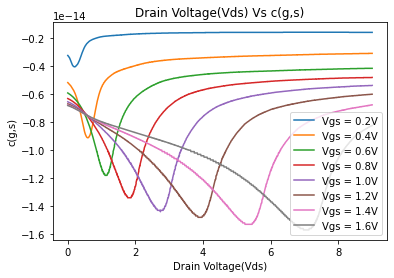

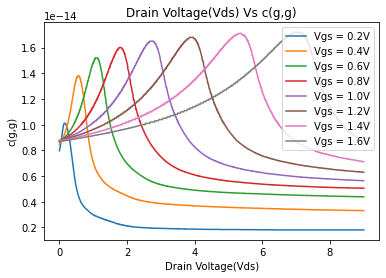

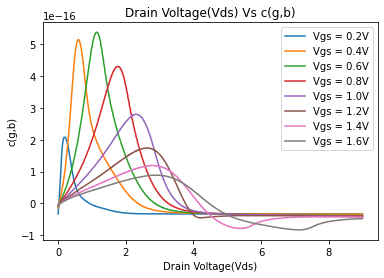

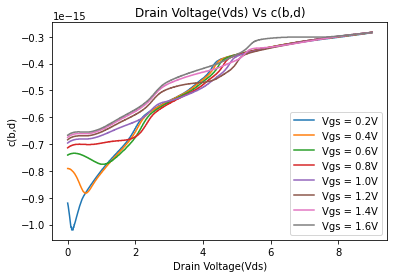

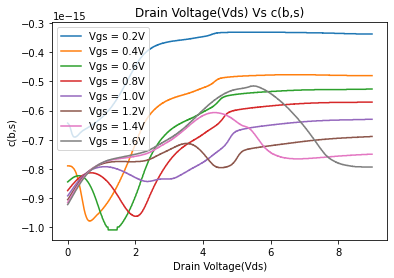

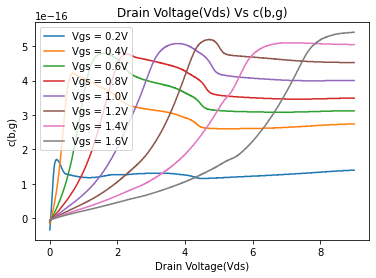

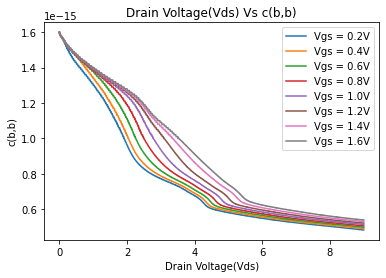

<Figure size 432x288 with 0 Axes>

In [ ]:
for cap in caps:
  plot_cap(Vgs, data_path, cap)